In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

from langdetect import detect

from lexicalrichness import LexicalRichness
from sklearn.feature_extraction.text import CountVectorizer # LDA
from sklearn.decomposition import LatentDirichletAllocation # LDA

from sklearn.feature_extraction.text import TfidfVectorizer # NFM TD-IDF
from sklearn.decomposition import NMF #NFM TD-IDF

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer

from collections import Counter
from collections import defaultdict

from datetime import datetime
from prettytable import PrettyTable
from langdetect import detect

import seaborn as sns
sns.set(style="darkgrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [47]:
reviews_file_main = pd.read_csv('dataset/reviews.csv', delimiter = ',')
listings_file_main = pd.read_csv('dataset/listings.csv', delimiter = ',')
listings_file_main_n = pd.read_csv('dataset/listingsN.csv', delimiter = ',')

print(type(reviews_file_main['comments']))
def get_reviews(segment):

    reviews_file = reviews_file_main.head(segment)
    reviews_file.dropna()
    
    return reviews_file

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.series.Series'>


<h1> Iteration 1 - No Date sorted </h1>

<h3> TTR Analysis </h3>

In [13]:

def calculate_ttr(segments):
    
    for i in segments:
        reviews_file = get_reviews(i)
        lex = LexicalRichness(" ".join([str(comments) for comments in list(reviews_file['comments'])]))
        
        print("Number of reviews from top: ", i)
        print("Word count: ",lex.words)
        print("Unique terms: ",lex.terms)
        print("TTR: ",lex.ttr)
        print("")
    
calculate_ttr([20, 200, 2000, 20000, 200000, 1000000])



Number of reviews from top:  20
Word count:  1254
Unique terms:  459
TTR:  0.3660287081339713

Number of reviews from top:  200
Word count:  14397
Unique terms:  2442
TTR:  0.1696186705563659

Number of reviews from top:  2000
Word count:  127752
Unique terms:  8945
TTR:  0.07001847329200325

Number of reviews from top:  20000
Word count:  1205299
Unique terms:  33464
TTR:  0.02776406518216642

Number of reviews from top:  200000
Word count:  11712352
Unique terms:  130549
TTR:  0.011146266778867302

Number of reviews from top:  1000000
Word count:  49519437
Unique terms:  337872
TTR:  0.006823017798041606



<h3> LDA - Latent Dirichlet Allocation </h3>

In [14]:
def lda(to_transform):
    
    count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
    doc_term_matrix = count_vect.fit_transform(to_transform)


    LDA = LatentDirichletAllocation(n_components=5, random_state=42)
    LDA.fit(doc_term_matrix)

    for i,topic in enumerate(LDA.components_):
        print(f'Top 10 words for topic #{i}:')
        print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
        print('\n')
        
reviews_file = get_reviews(20000)
lda(reviews_file['comments'].values.astype('U'))

Top 10 words for topic #0:
['really', 'roger', 'lovely', 'agri', 'great', 'place', 'house', 'room', 'nice', 'stay']


Top 10 words for topic #1:
['dans', 'appartement', 'bien', 'pour', 'le', 'nous', 'la', 'est', 'très', 'et']


Top 10 words for topic #2:
['tube', 'nice', 'clean', 'place', 'location', 'flat', 'apartment', 'stay', 'london', 'great']


Top 10 words for topic #3:
['wir', 'el', 'ist', 'sehr', 'la', 'die', 'muy', 'es', 'en', 'und']


Top 10 words for topic #4:
['location', 'comfortable', 'time', 'room', 'home', 'host', 'place', 'great', 'london', 'stay']




<h3> NMF - Non-Negative Matrix Factorization </h3>

In [17]:
def nmf(to_transform):
    
    tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
    doc_term_matrix = tfidf_vect.fit_transform(to_transform)

    nmf = NMF(n_components=5, random_state=42)
    nmf.fit(doc_term_matrix )

    for i,topic in enumerate(nmf.components_):
        print(f'Top 10 words for topic #{i}:')
        print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
        
reviews_file = get_reviews(20000)        
nmf(reviews_file['comments'].values.astype('U'))

Top 10 words for topic #0:
['clean', 'friendly', 'home', 'lovely', 'house', 'really', 'place', 'room', 'stay', 'nice']
Top 10 words for topic #1:
['15', '14', 'day', 'host', 'days', 'arrival', 'automated', 'posting', 'reservation', 'canceled']
Top 10 words for topic #2:
['excellent', 'highly', 'thanks', 'definitely', 'recommend', 'stay', 'host', 'place', 'location', 'great']
Top 10 words for topic #3:
['dans', 'appartement', 'pour', 'bien', 'le', 'nous', 'la', 'est', 'très', 'et']
Top 10 words for topic #4:
['clean', 'perfect', 'station', 'easy', 'walk', 'close', 'tube', 'london', 'apartment', 'flat']


<h3> Word Frequency </h3>

[('stay', 5175), ('great', 5008), ('london', 4605), ('place', 3750), ('room', 3008), ('location', 2923), ('host', 2819), ('us', 2694), ('nice', 2673), ('clean', 2670)]


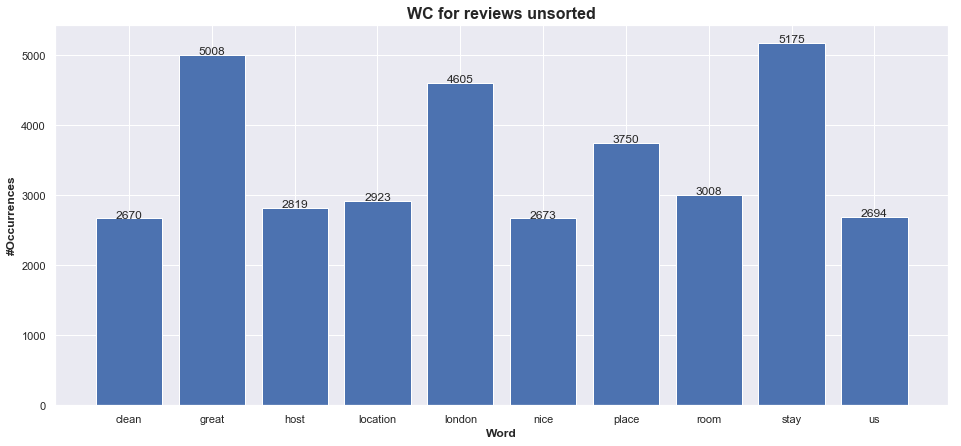

In [20]:
def find_wf(example_sent):
    
    reviews_file = get_reviews(example_sent[0])
    from_reviews = " ".join([str(comments) for comments in list(reviews_file['comments'])])
        
    tokenizer = RegexpTokenizer(r'\w+')
    result_tokens = tokenizer.tokenize(from_reviews)
    stop_words = set(stopwords.words('english'))
    rejoin = " ".join(result_tokens)
    word_tokens = word_tokenize(rejoin.lower()) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    freq = list(dict(Counter(filtered_sentence)).items())
    sorted_freq = sorted(freq, reverse = True, key = lambda x: x[1])

    words = [word[0] for word in sorted_freq][0:10]
    frequency = [freq[1] for freq in sorted_freq][0:10]
    print(sorted_freq[0:10])
    
    
    plt.figure(figsize=(16,7))
    plt.bar(words, frequency)
    plt.xlabel('Word', fontsize=12, fontweight="bold")
    plt.ylabel('#Occurrences', fontsize=12, fontweight="bold")
    plt.title('WC for reviews unsorted', fontsize = 16, fontweight="bold")
    for a,b in zip(words, frequency):
        plt.text(a, b, str(b), horizontalalignment='center')
    plt.show()

find_wf([10000])

<h1> Iteration 2 - Dates Sorted </h1>

In [57]:
coupled = [(date, review) for date, review in zip(list(reviews_file_main['date']), list(reviews_file_main['comments']))]
coupled_sorted = sorted(coupled, reverse = False, key = lambda x: x[0])

just_reviews_series = pd.Series([review[1] for review in coupled_sorted])
traversed_dates = [datetime(year, 1, 1) for year in range(2010,2020)]
date_positioning = []
date_positioning_2 = [1, 169, 1477, 7866, 26564, 68292, 160406, 340463, 624425, 1068793]

counter = 0
for each_date in traversed_dates:
    for each_review_date in coupled_sorted[counter:]:
        if each_date > datetime(*map(int, each_review_date[0].split('-'))):
            counter += 1
        else:
            break
    date_positioning.append(counter)

<h3> TTR #1 Cumulative  </h3>
   

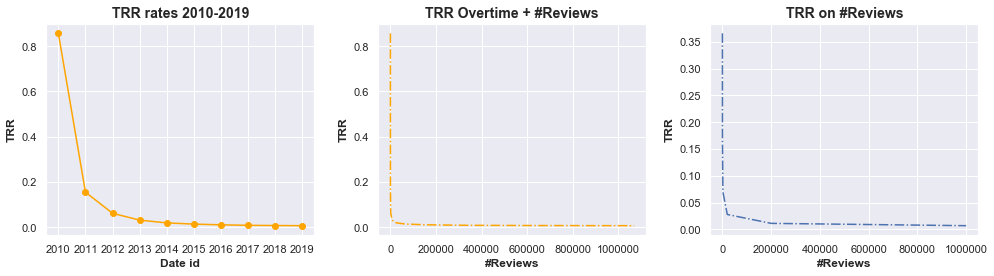

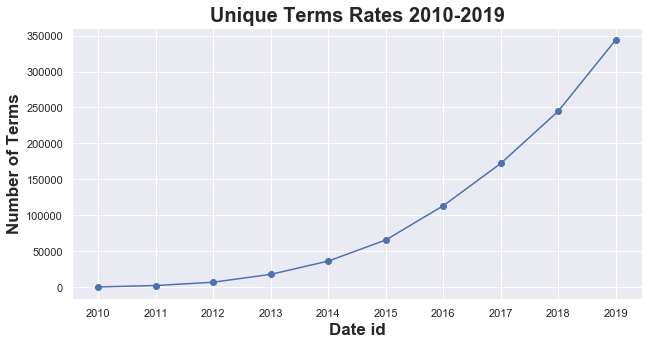

In [22]:
def get_just_reviews(segment):

    reviews_file = just_reviews_series.head(segment)
    reviews_file.dropna()
    
    return reviews_file

def calculate_ttr(segments):
    
    ttr_values = []
    ttr_values_2 = [
                    0.8571428571428571, 0.15486725663716813, 
                    0.06144981861030442, 0.03117285264322806, 
                    0.018954199271226692, 0.0135989986314741,
                    0.010474976886623027, 0.008224299190462135,
                    0.007261969645840463, 0.0065978822898372985
                   ]
    ttr_values_no_date = [
                          0.3660287081339713, 0.1696186705563659, 
                          0.07001847329200325,0.02776406518216642, 
                          0.011146266778867302, 0.006823017798041606  
                         ]
    unique_terms = []
    unique_terms_2 = [30, 2030, 6623, 17577, 36084, 65425, 113096, 172115, 244897, 344198]
                
    
#     for i in segments[0:8]:
#         reviews_file = get_just_reviews(i)
#         lex = LexicalRichness(" ".join([str(comments) for comments in list(reviews_file)]))
        
#         print("Number of reviews: ", i)
#         print("Word count: ",lex.words)
        
#         lex_terms = lex.terms
#         print("Unique terms: ",lex_terms)
#         unique_terms.append(lex_terms)
        
#         lex_ttr = lex.ttr
#         print("TTR: ",lex_ttr)
#         ttr_values.append(lex_ttr)
#         print("")
    
    
    my_dates = dates.date2num(traversed_dates)
    date_equiv = [20, 200, 2000, 20000, 200000, 1000000]
    
    plt.figure(figsize=(14,4))
    plt.subplot(1, 3, 1)
    plt.xlabel('Date id', fontsize=12, fontweight = 'bold')
    plt.ylabel('TRR', fontsize=12, fontweight = 'bold')
    plt.title('TRR rates 2010-2019', fontsize=14, fontweight="bold")
    plt.plot_date(my_dates, ttr_values_2, ls = "solid", color = "orange")
    
    plt.subplot(1, 3, 2)
    plt.xlabel('#Reviews', fontsize=12, fontweight = 'bold')
    plt.ylabel('TRR', fontsize=12, fontweight = 'bold')
    plt.title('TRR Overtime + #Reviews', fontsize=14, fontweight="bold")
    plt.plot(date_positioning_2, ttr_values_2, ls = "dashdot", color = "orange")
    
    plt.subplot(1, 3, 3)
    plt.xlabel('#Reviews', fontsize=12, fontweight = 'bold')
    plt.ylabel('TRR', fontsize=12, fontweight = 'bold')
    plt.title('TRR on #Reviews', fontsize=14, fontweight="bold")
    plt.plot(date_equiv, ttr_values_no_date, ls = "dashdot")

    plt.tight_layout() 
    
    plt.figure(figsize=(10.2,5))
    plt.xlabel('Date id', fontsize=17, fontweight="bold")
    plt.ylabel('Number of Terms', fontsize=17, fontweight="bold")
    plt.title('Unique Terms Rates 2010-2019', fontsize=20, fontweight="bold")
    plt.plot_date(my_dates, unique_terms_2, ls = "solid")
    
    
calculate_ttr(date_positioning)

<h3> TTR #2 Each Year </h3>

+------+-------------------+-----------------+--------------+----------------------+
| year | Number of Reviews | Number of Words | Unique Terms |         TTR          |
+------+-------------------+-----------------+--------------+----------------------+
| 2011 |        168        |      13073      |     2029     | 0.15520538514495524  |
| 2012 |        1308       |      94671      |     6159     | 0.06505688119910004  |
| 2013 |        6389       |      456077     |    15941     | 0.034952431278051733 |
| 2014 |       18698       |     1339891     |    30603     | 0.022839917575384863 |
| 2015 |       41728       |     2907269     |    52184     |  0.0179494914299296  |
| 2016 |       92114       |     5985762     |    86607     |  0.0144688345443738  |
| 2017 |       180057      |     10130841    |    117831    | 0.011630919881182618 |
| 2018 |       283962      |     12795601    |    148942    | 0.011640094122972419 |
| 2019 |       444368      |     18444731    |    198579    | 0.0

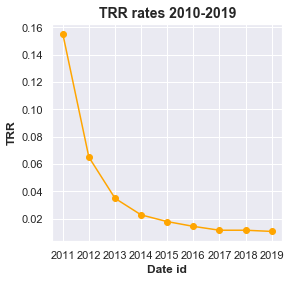

In [67]:
def get_just_reviews_yearly(segment):
    reviews_file = just_reviews_series[segment[1]:segment[0]]
    reviews_file.dropna()
    
    return reviews_file

def calculate_ttr_yearly(segments):
    
    unique_terms = []
    ttr_values = []
    sliced_values=[0,0]
    
    x = PrettyTable()
    x.field_names = ['year', 'Number of Reviews', 'Number of Words', 'Unique Terms', 'TTR']
    start = "2010"
    for counter, current in enumerate(segments):
        
        if counter != 0:
            sliced_values[0] = current
            sliced_values[1] = segments[counter - 1]
            reviews_file = get_just_reviews_yearly(sliced_values)
            lex = LexicalRichness(" ".join([str(comments) for comments in list(reviews_file)]))

            lex_terms = lex.terms
            unique_terms.append(lex_terms)

            lex_ttr = lex.ttr
            ttr_values.append(lex_ttr)
            
            x.add_row([int(start) + counter, current-segments[counter-1], lex.words, lex_terms, lex_ttr])
    print(x)
    my_dates = dates.date2num(traversed_dates)
    plt.figure(figsize=(14,4))
    plt.subplot(1, 3, 1)
    plt.xlabel('Date id', fontsize=12, fontweight = 'bold')
    plt.ylabel('TRR', fontsize=12, fontweight = 'bold')
    plt.title('TRR rates 2010-2019', fontsize=14, fontweight="bold")
    plt.plot_date(my_dates[1:], ttr_values, ls = "solid", color = "orange")

calculate_ttr_yearly(date_positioning_2)

<h3> WC sorted by date </h3>

In [24]:
def find_wf(example_sent):
    
    for i, position in enumerate(example_sent):
        reviews_file = get_just_reviews(position)
        from_reviews = " ".join([str(comments) for comments in list(reviews_file)])

        tokenizer = RegexpTokenizer(r'\w+')
        result_tokens = tokenizer.tokenize(from_reviews)
        stop_words = set(stopwords.words('english'))
        rejoin = " ".join(result_tokens)
        word_tokens = word_tokenize(rejoin.lower()) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        freq = list(dict(Counter(filtered_sentence)).items())
        sorted_freq = sorted(freq, reverse = True, key = lambda x: x[1])

        words = [word[0] for word in sorted_freq][0:10]
        frequency = [freq[1] for freq in sorted_freq][0:10]
#         print(sorted_freq[0:10])
    
        plt.figure(figsize=(10,5))
        plt.bar(words, frequency)
        plt.xlabel('Word', fontsize=12, fontweight="bold")
        plt.ylabel('#Occurrences', fontsize=12, fontweight="bold")
        plt.title('WC for reviews sorted ' + str(traversed_dates[i+1])[0:11], fontsize = 16, fontweight="bold")
        for a,b in zip(words, frequency):
            plt.text(a, b, str(b), horizontalalignment='center')
        plt.show()

# find_wf([169, 1477, 7866, 26564, 68292, 160406, 340463, 624425, 1068793])

<h3> TTR Listings </h3>

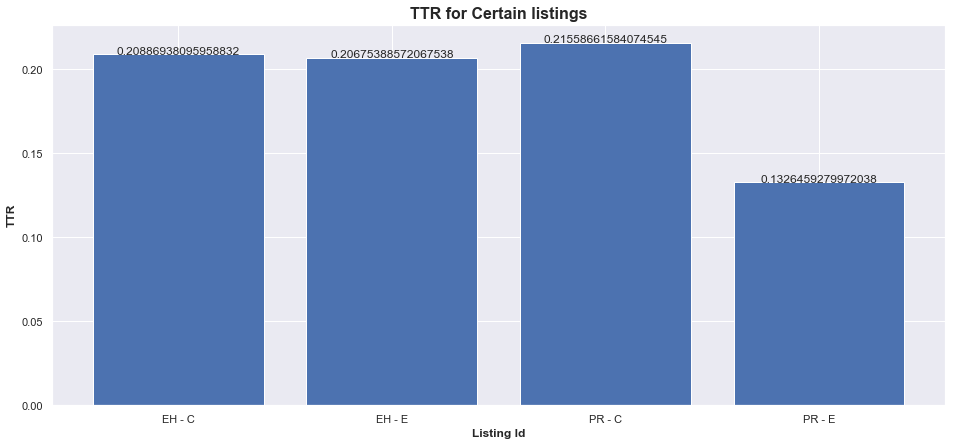

In [147]:
room_ids = [15400,62970, 25123, 59656]
ids = ["EH - C", "EH - E", "PR - C", "PR - E"]
# [ EntireHome 85revs - £100/day, 
#   EntireHome 139revs - £350/day,
#   PrivateRoom 122revs - £29/day, 
#   PrivateRoom 187revs - £75/day ]

def calculate_ttr(coupled_sorted):

    ttr_values = []
    unique_terms = []
    for counter, each_place in enumerate(coupled_sorted):
        just_reviews_series = pd.Series([review[1] for review in each_place])
        lex = LexicalRichness(" ".join([str(comments) for comments in list(just_reviews_series)]))
        
#         print("Number of reviews: ", i)
#         print("Word count: ",lex.words)
        
        lex_terms = lex.terms
#         print("Unique terms: ",lex_terms)
        unique_terms.append(lex_terms)
        
        lex_ttr = lex.ttr
#         print("TTR: ",lex_ttr)
        ttr_values.append(lex_ttr)
        
    plt.figure(figsize=(16,7))
    plt.bar(ids, ttr_values)
    plt.xlabel('Listing Id', fontsize=12, fontweight="bold")
    plt.ylabel('TTR', fontsize=12, fontweight="bold")
    plt.title('TTR for Certain listings', fontsize = 16, fontweight="bold")
    for a,b in zip(ids, ttr_values):
        plt.text(a, b, str(b), horizontalalignment='center')
    plt.show()
        
def get_comments_id(id_place):
    return [(date, review, listing_id) for date, review, listing_id in zip(list(reviews_file_main['date']),\
                                                                           list(reviews_file_main['comments']), list(reviews_file_main['listing_id'])) if listing_id == id_place]

all_ids = [ get_comments_id(id_place) for id_place in room_ids]

def create_corpus_ttr(all_id_places):

    coupled_sorted = [sorted(id_place, reverse = False, key = lambda x: x[0]) for id_place in all_id_places]
    calculate_ttr(coupled_sorted)
    
create_corpus_ttr(all_ids)




<h3> NMF Listings </h3>

In [148]:
def nmf_2(to_transform):
    topic_table = PrettyTable()
    topic_table.field_names = ['id', 'Words']
    tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
    doc_term_matrix = tfidf_vect.fit_transform(to_transform)

    nmf = NMF(n_components=5, random_state=42)
    nmf.fit(doc_term_matrix )

    for i,topic in enumerate(nmf.components_):
        topic_table.add_row(["Topic " + str(i), [tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]]])
    return topic_table

counter = 0
for id_place,which_id in zip(all_ids, room_ids):
    print("#"+str(which_id)+"# " + ids[counter])
    each_place = sorted(id_place, reverse = False, key = lambda x: x[0])
    just_reviews_series = pd.Series([review[1] for review in each_place])
    topic_table = nmf_2(just_reviews_series.values.astype('U'))
    print(topic_table)
    print("")
    counter += 1

#15400# EH - C
+---------+-------------------------------------------------------------------------------------------------------------+
|    id   |                                                    Words                                                    |
+---------+-------------------------------------------------------------------------------------------------------------+
| Topic 0 | ['located', 'walk', 'comfortable', 'waitrose', 'corner', 'just', 'philippa', 'stay', 'london', 'apartment'] |
| Topic 1 |      ['little', 'super', 'philippa', 'central', 'good', 'welcome', 'nice', 'flat', 'location', 'great']     |
| Topic 2 |      ['like', 'spend', 'great', 'convenient', 'kensington', 'need', 'chelsea', 'away', 'place', 'home']     |
| Topic 3 |                 ['llegamos', 'fue', 'tiene', 'donde', 'bien', 'se', 'el', 'en', 'que', 'la']                |
| Topic 4 |        ['amazing', 'easy', 'place', 'perfect', 'philippa', 'stay', 'lovely', 'bus', 'flat', 'close']        |
+--------

<h1> Iteration 3 - Properties Quadrant </h1>

+------------------------+----------------------+-------------------+
|          Area          | Number of Properties | Number of Reviews |
+------------------------+----------------------+-------------------+
|       Islington        |         5156         |       88680       |
| Kensington and Chelsea |         5852         |       92783       |
|      Westminster       |         9411         |       172408      |
|       Wandsworth       |         4262         |       55721       |
|         Barnet         |         1577         |       17540       |
|         Newham         |         1964         |       29384       |
|        Hounslow        |         1005         |       19011       |
|         Camden         |         5968         |       119865      |
|  Richmond upon Thames  |         1198         |       20722       |
|        Haringey        |         2143         |       31422       |
|        Hackney         |         6116         |       87243       |
|        Croydon    

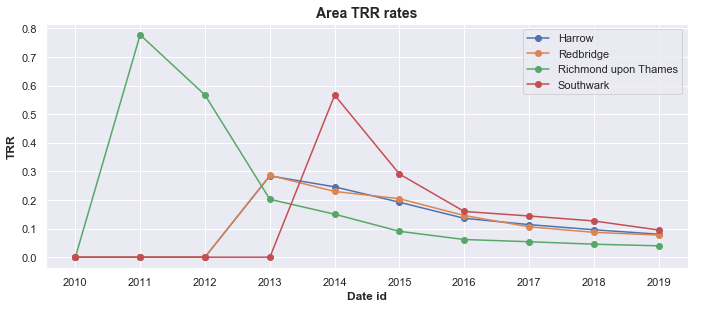

In [162]:
from itertools import islice

location_and_ids = [(prop_id, neighbourhood, number_of_reviews) for prop_id, neighbourhood, number_of_reviews in zip(list(listings_file_main_n['id']), list(listings_file_main_n['neighbourhood']), list(listings_file_main_n['number_of_reviews']))]
location_and_ids_dict = defaultdict(list)

for prop_id, neighbourhood, number_of_reviews in location_and_ids:
    location_and_ids_dict[neighbourhood].append((prop_id, number_of_reviews))

possible_neighbourhoods = [each_loc for each_loc in location_and_ids_dict.keys()]

all_properties = PrettyTable()
all_properties.field_names = ['Area', 'Number of Properties', 'Number of Reviews']
for each_loc, each_loc_id in location_and_ids_dict.items():
    all_properties.add_row([each_loc, len(each_loc_id), sum(tuple2[1] for tuple2 in each_loc_id)]) 
print(all_properties)

## Now create a dictionary such as ... {"<location_name>": [{<"prop_id"> : [(<date>,<review_prop_id1_1>)...()]}, {<"prop_id2">...}] 
location_and_properties_review = defaultdict(list)
three_way = [(date, review, listing_id) for date, review, listing_id in zip(list(reviews_file_main['date']), list(reviews_file_main['comments']), list(reviews_file_main['listing_id']))]
 
def calc_ttr(coupled_sorted, date_positioning, neighbourhood):
    
    unique_terms = []
    ttr_values = []
    sliced_values=[0, 0]
    miss_zereos = 0
    for counter, current in enumerate(date_positioning):
        
        if counter != 0 and current != 0:
            sliced_values[0] = current
            sliced_values[1] = date_positioning[counter - 1]
            reviews_file = [str(date_review[1]) for date_review in coupled_sorted][sliced_values[1]:sliced_values[0]]
            lex = LexicalRichness(" ".join([str(comments) for comments in list(reviews_file)]))

            lex_terms = lex.terms
            unique_terms.append(lex_terms)

            lex_ttr = lex.ttr
            ttr_values.append(lex_ttr)
        else:
            miss_zereos += 1
            
    for each_miss in range(miss_zereos):
        ttr_values.insert(0, 0)

    my_dates = dates.date2num(traversed_dates)
    plt.figure(figsize=(9.5,3.5))
    plt.xlabel('Date id', fontsize=12, fontweight = 'bold')
    plt.ylabel('TRR', fontsize=12, fontweight = 'bold')
    plt.title(neighbourhood + ' TRR rates', fontsize=14, fontweight="bold")
    plt.plot_date(my_dates, ttr_values, ls = "solid", color = "orange")
    
def sort_by_date(big_string):
    date_positioning = []
    counter = 0
    for each_date in traversed_dates:
        for each_review_date in big_string[counter:]:
            if each_date > datetime(*map(int, each_review_date[0].split('-'))):
                counter += 1
            else:
                break
        date_positioning.append(counter)
    return date_positioning
        
def generate_string(neighbourhood):
    big_string = []
    current_prop_ids = [prop_id[0] for prop_id in location_and_ids_dict[neighbourhood]]
    for three_way_tuple in three_way:
        if three_way_tuple[2] in current_prop_ids:
            big_string.append((three_way_tuple[0], three_way_tuple[1])) ## (date, review) as a tuple
    
    
    create_sorted_reviews = sorted(big_string, reverse = False, key = lambda x: x[0])
    just_reviews_series = pd.Series([str(review[1]) for review in create_sorted_reviews])
    return just_reviews_series

#     date_pos = sort_by_date(create_sorted_reviews)
#     calc_ttr(create_sorted_reviews, date_pos, neighbourhood)
    

four_areas_ttr2 = [[0, 0, 0, 0.28433268858800775, 0.24594155844155843, 0.1921589127025614, 0.13599448737510458, 0.1138782751091703, 0.09587072901905212, 0.08026600680482524], [0, 0, 0, 0.28619302949061665, 0.2299028579473462, 0.2044912990107589, 0.1456943366951125, 0.10620770178814677, 0.08685001814505677, 0.07731189614652889], [0, 0.7777777777777778, 0.5673758865248227, 0.20233960884664595, 0.150249966220781, 0.09047029390210003, 0.06183540344920025, 0.05402054185868689, 0.0453869764846148, 0.03974476511789945], [0, 0, 0, 0, 0.5667311411992263, 0.29082426127527217, 0.15990202939118264, 0.14401720892713096, 0.12671172906524708, 0.0950269648071963]]
my_dates = dates.date2num(traversed_dates)
plt.figure(figsize=(11.5,4.5))
plt.xlabel('Date id', fontsize=12, fontweight = 'bold')
plt.ylabel('TRR', fontsize=12, fontweight = 'bold')
plt.title('Area TRR rates', fontsize=14, fontweight="bold")
plt.plot_date(my_dates, four_areas_ttr2[0], ls = "solid", label = 'Harrow')
plt.plot_date(my_dates, four_areas_ttr2[1], ls = "solid", label = 'Redbridge')
plt.plot_date(my_dates, four_areas_ttr2[2], ls = "solid", label = 'Richmond upon Thames')
plt.plot_date(my_dates, four_areas_ttr2[3], ls = "solid", label = 'Southwark')
plt.legend(loc="upper right")



<h3> NMF for 4 areas </h3>


In [163]:
neighbourhoods = ['Harrow', 'Redbridge', 'Richmond upon Thames', 'Southwark']
for neigh in neighbourhoods:
    just_reviews_series = generate_string(neigh)
    topic_table = nmf_2(just_reviews_series.values.astype('U'))
    print(topic_table.get_string(title=neigh))



+----------------------------------------------------------------------------------------------------------------------+
|                                                        Harrow                                                        |
+---------+------------------------------------------------------------------------------------------------------------+
|    id   |                                                   Words                                                    |
+---------+------------------------------------------------------------------------------------------------------------+
| Topic 0 |   ['friendly', 'recommend', 'stay', 'london', 'home', 'comfortable', 'clean', 'house', 'room', 'lovely']   |
| Topic 1 |     ['14', '13', 'day', 'host', 'days', 'arrival', 'reservation', 'canceled', 'posting', 'automated']      |
| Topic 2 | ['thank', 'thanks', 'recommended', 'communication', 'value', 'location', 'place', 'host', 'stay', 'great'] |
| Topic 3 |     ['varry', 'frien